In [1]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format

In [2]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [3]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

106


In [4]:
X = []

In [5]:
for k in range(0,len(sn_names)):
    
    #print(sn_names[k])
    
    file = open(sn_names[k])
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(float(co[0]))     

    xtemp = np.array(xtemp)/max(xtemp)
        
    z = np.reshape(xtemp, (601, 61))

    zz = []
    xx = []
    yy = []

    for i in range(0,len(y)):

        for j in range(0,len(x)):

            zz.append(z[i][j])
            xx.append(x[j])
            yy.append(y[i])

    X.append(np.array(zz))

In [6]:
pca = PCA(n_components=0.5, whiten=True)
pca.fit(X)

PCA(n_components=0.5, whiten=True)

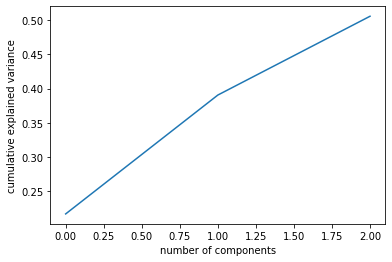

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [9]:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3000,9000,601)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

## Superfície média

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

In [11]:
%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Componentes

In [12]:
N = 5

In [13]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

In [14]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_cl…

## Superfícies originais

In [15]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

In [16]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [17]:
sn_names[0]

'SN2001V.dat'

## Superfícies com x %

In [18]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

In [19]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [20]:
from scipy.stats import skew

In [21]:
medvec = projected.mean(axis=0)

stdvec = projected.var(axis=0)

In [22]:
skewvec = []

In [23]:
for i in range(0, len(projected[0])):
    
    templist = []
    for j in range(0, len(projected)):
        
        templist.append(projected[j][i])
        
    skewvec.append(skew(templist))

In [26]:
medvec = np.array(medvec)/max(medvec)
stdvec = np.array(stdvec)/max(stdvec)
skewvec = np.array(skewvec)/max(skewvec)

<IPython.core.display.Javascript object>


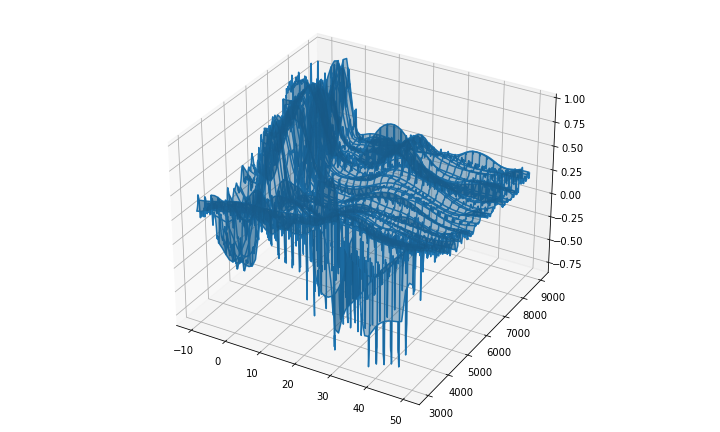

In [27]:
%matplotlib notebook

Z = interp.griddata((xx,yy),skewvec,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
plt.show()

In [38]:
save_path = '/home/joao/Documents/'

In [39]:
Z = interp.griddata((xx,yy),medvec,(B1,B2),method='cubic')

In [40]:
f = Z.transpose()

In [41]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(f[i][j])

In [42]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "Med.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()